# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('glass.csv')# load the dataset

In [4]:
data.head()# checking the top 5 rows

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# checking the null values in our dataset

In [5]:
data.info()# No null values present in our dataset and all the data types are non-object type so we can proceed further

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data.describe()# doing statistical anaylysis

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
data.shape# chekc the shape of our dataset

(214, 10)

# VISUALIZATION

<AxesSubplot:>

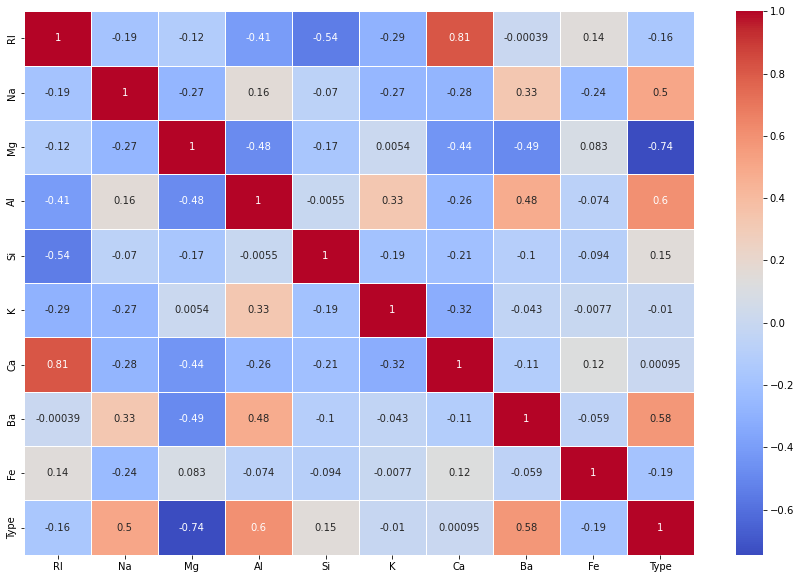

In [8]:
#plotting the correlation heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(data = data.corr(), annot =True, linewidth = 0.5, linecolor = 'white', cmap="coolwarm")

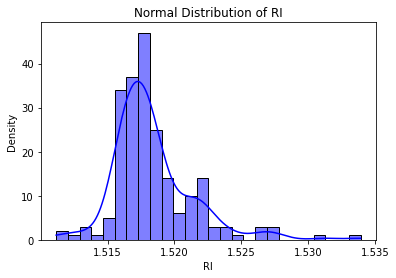

In [9]:

sns.histplot(data["RI"], kde=True, color='blue')

# Set plot title and labels
plt.title('Normal Distribution of RI')
plt.xlabel('RI')
plt.ylabel('Density')

# Show the plot
plt.show()


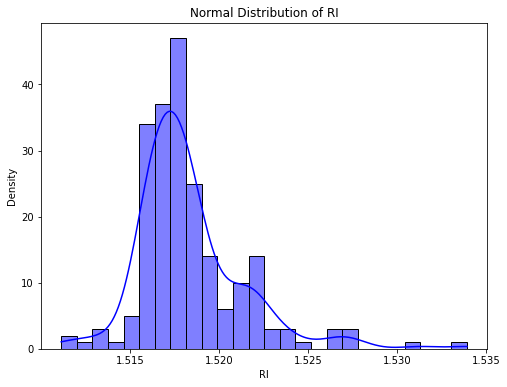

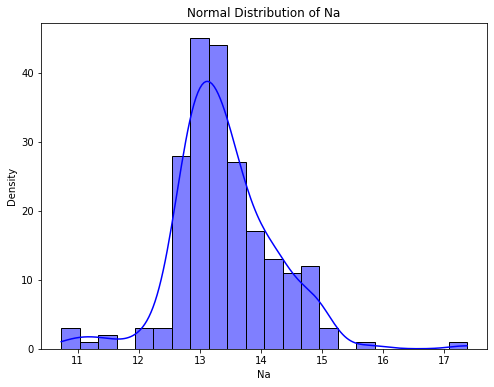

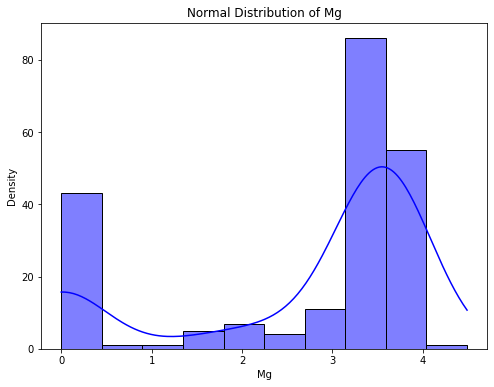

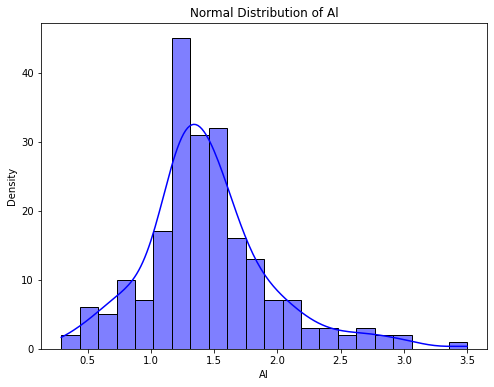

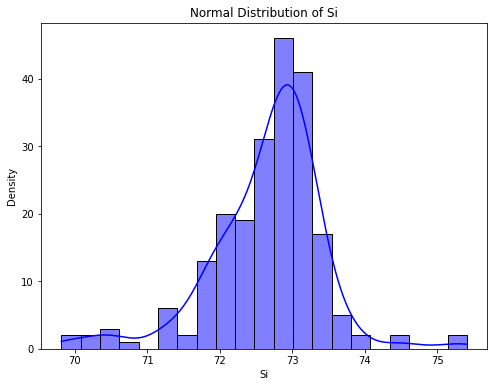

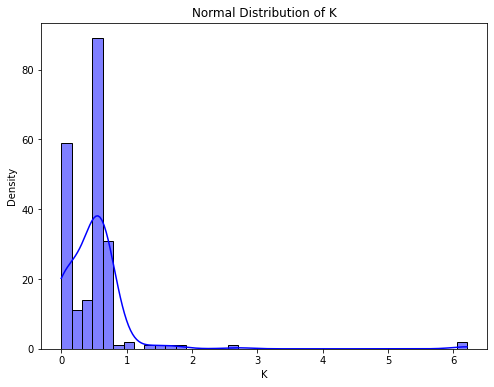

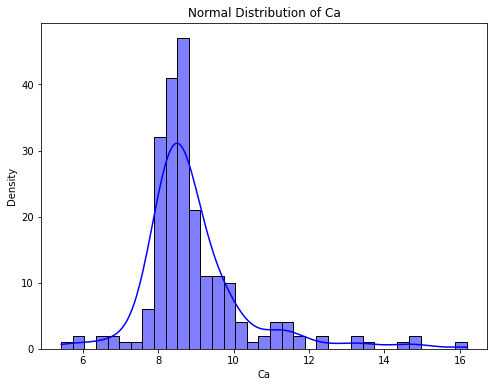

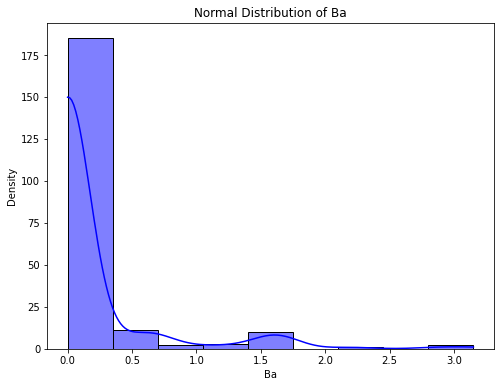

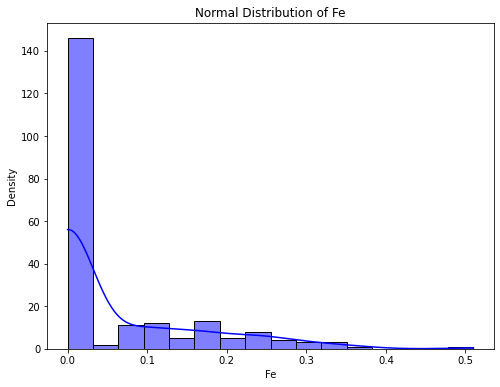

In [10]:
# Iterate through each variable and create a normal distribution plot
for column in data.columns:
    if column != "Id" and column != "Type":
        plt.figure(figsize=(8, 6))
        sns.histplot(data[column], kde=True, color='blue')
        plt.title(f"Normal Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Density")
        plt.show()


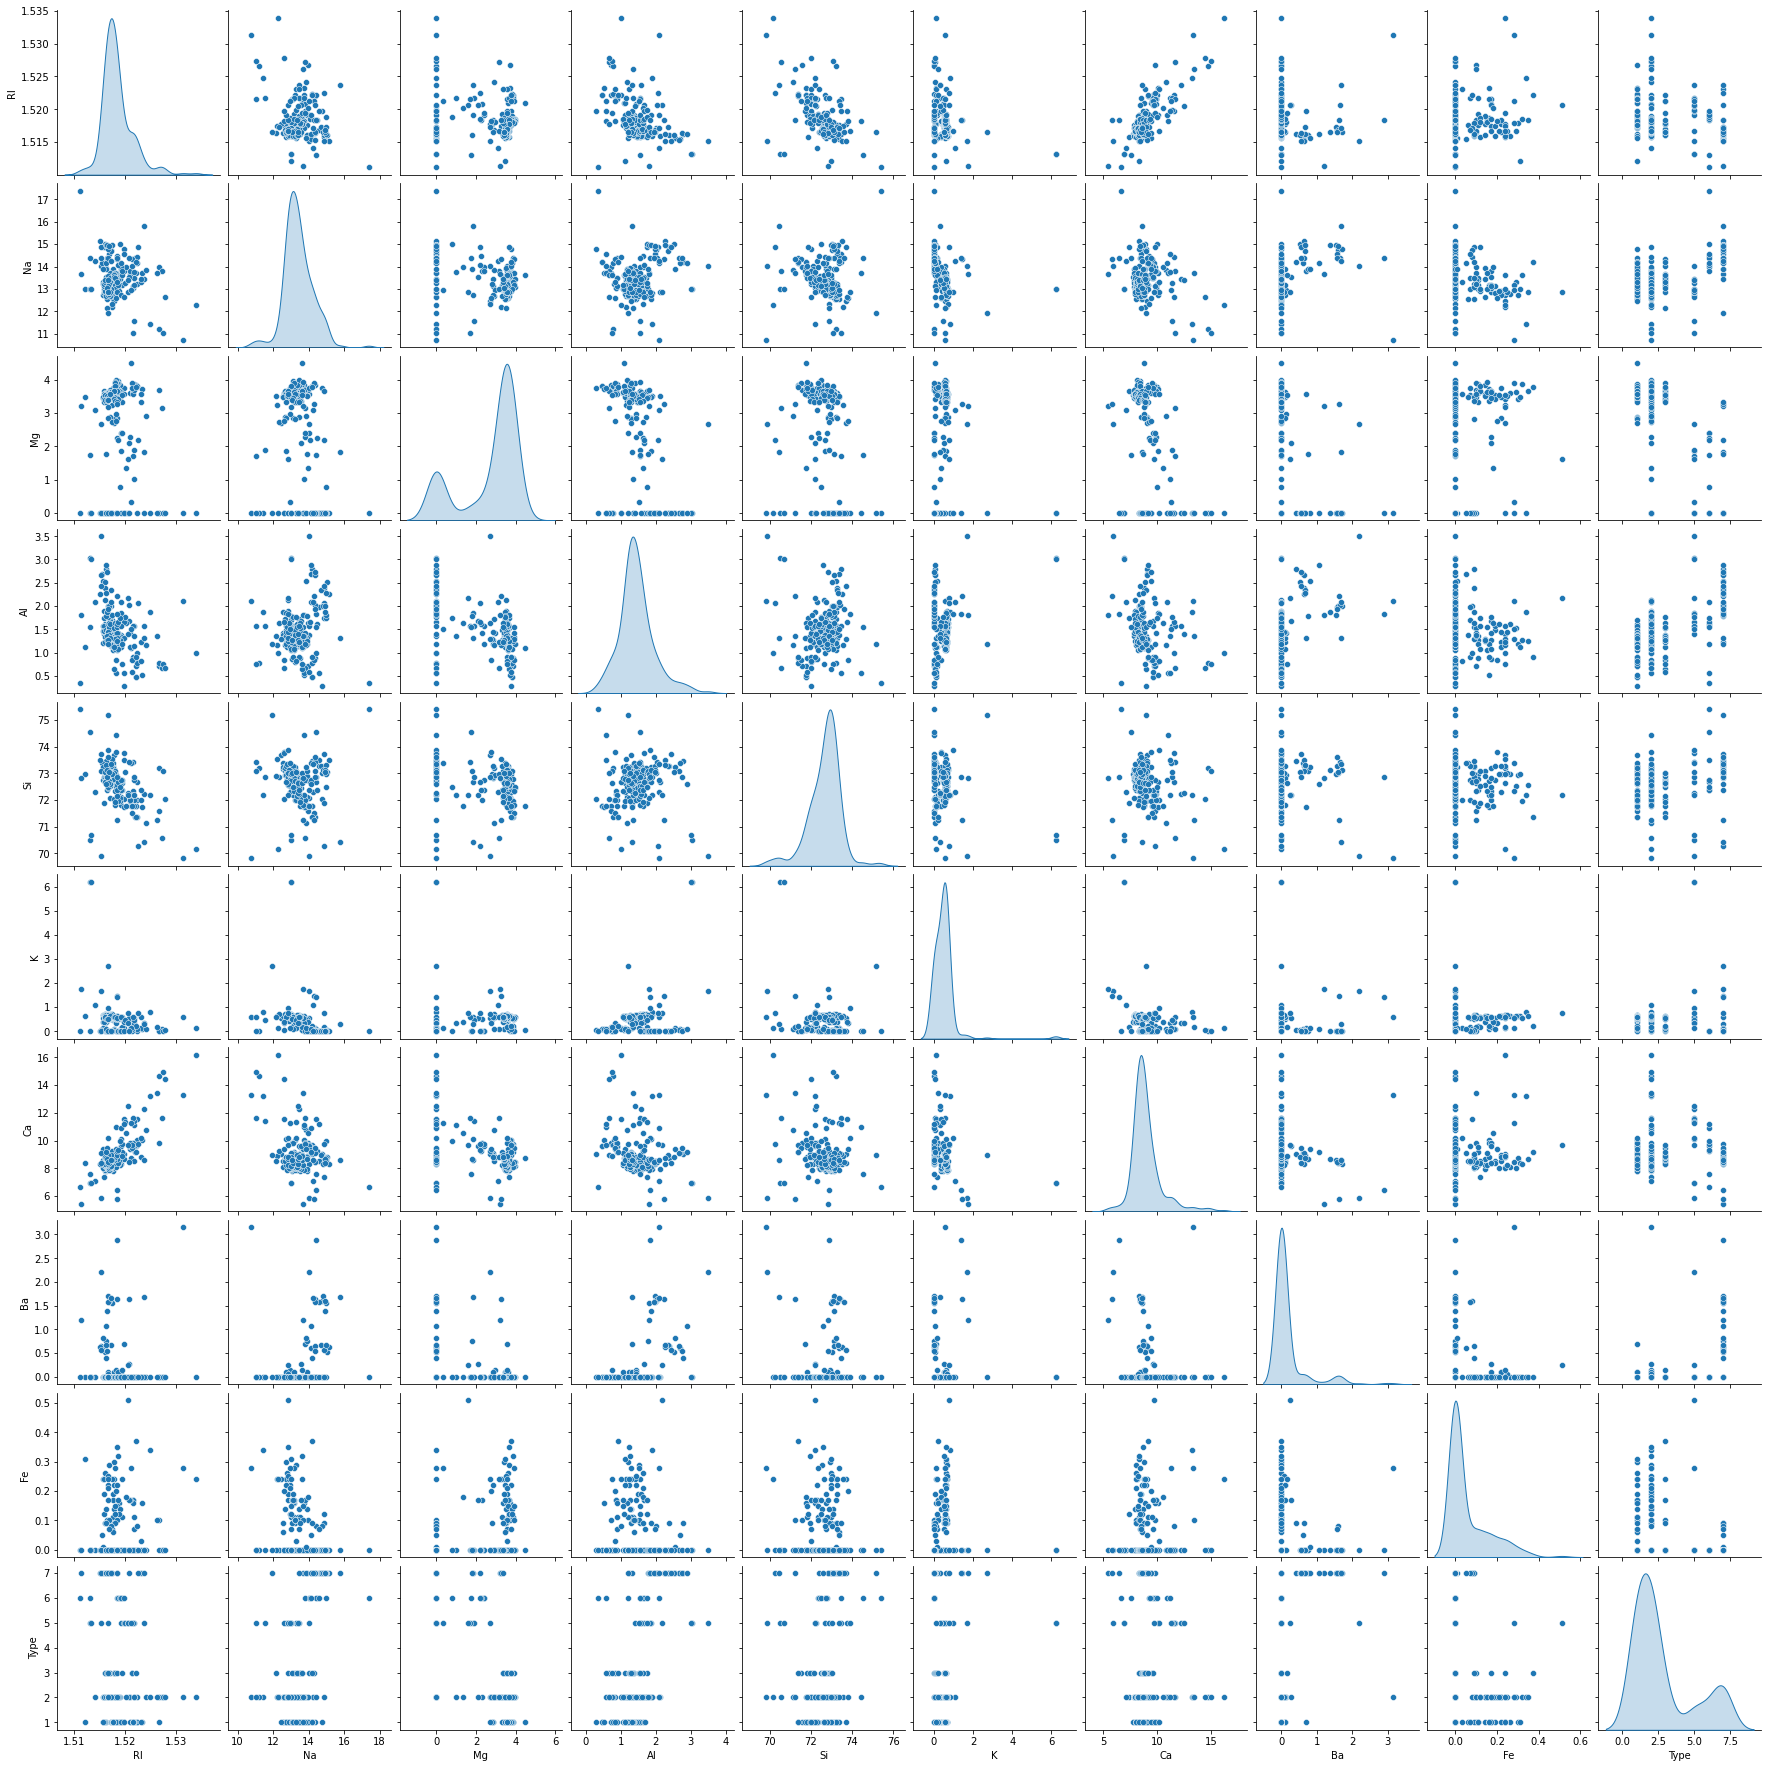

In [11]:
# plotting pair plot
sns.pairplot(data, diag_kind="kde")


plt.show()


In [ ]:
#plotting box plot to check for outliers

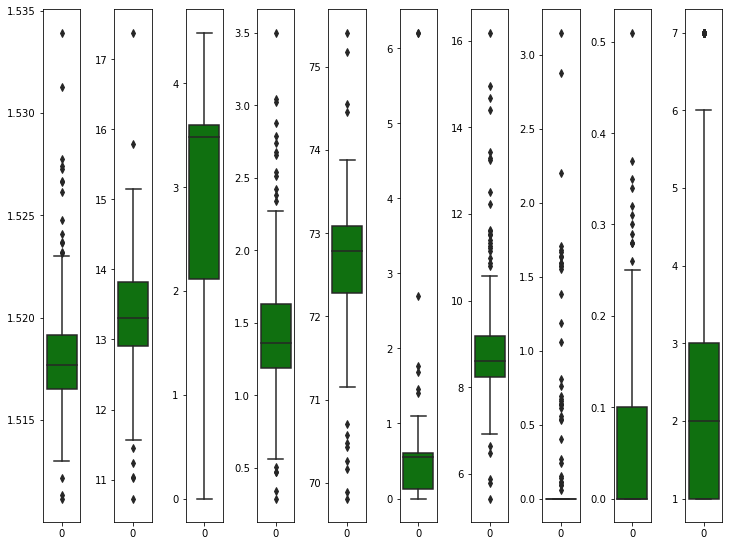

In [16]:
collist = data.columns.values
ncol= 35
nrows = 14
plt.figure(figsize = (ncol, 3*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(data = data[collist[i]], color = 'green', orient = 'v')
    plt.tight_layout()

In [17]:
data.skew() # to chekc the skewness

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [18]:
# To remove the outliers present in our dataset
from scipy.stats import zscore
import numpy as np

In [19]:
z = np.abs(zscore(data))
print(z)

           RI        Na        Mg        Al        Si         K        Ca  \
0    0.872868  0.284953  1.254639  0.692442  1.127082  0.671705  0.145766   
1    0.249333  0.591817  0.636168  0.170460  0.102319  0.026213  0.793734   
2    0.721318  0.149933  0.601422  0.190912  0.438787  0.164533  0.828949   
3    0.232831  0.242853  0.698710  0.310994  0.052974  0.112107  0.519052   
4    0.312045  0.169205  0.650066  0.411375  0.555256  0.081369  0.624699   
..        ...       ...       ...       ...       ...       ...       ...   
209  0.704815  0.898681  1.865511  2.881125  0.052974  0.640968  0.157088   
210  0.500178  1.856097  1.865511  1.094342  0.529374  0.763919  0.392276   
211  0.754046  1.168721  1.865511  1.154570  0.995252  0.763919  0.364103   
212  0.612399  1.193270  1.865511  0.993960  1.241133  0.763919  0.335931   
213  0.414363  1.009152  1.865511  1.275028  0.917606  0.763919  0.237327   

           Ba        Fe      Type  
0    0.352877  0.586451  0.848275  
1  

In [21]:
z.shape, type(z)

((214, 10), pandas.core.frame.DataFrame)

In [22]:
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [23]:
z.iloc[13]

RI      0.292241
Na      0.672462
Mg      0.608372
Al      0.351146
Si      0.723490
K       0.066000
Ca      0.406362
Ba      0.352877
Fe      1.162326
Type    0.848275
Name: 13, dtype: float64

In [24]:
len(np.where(z>3)[0])# since there are 33 outliers in our dataset

33

In [25]:
data_new = data[(z<3).all(axis = 1)]

In [26]:
data_new.shape

(194, 10)

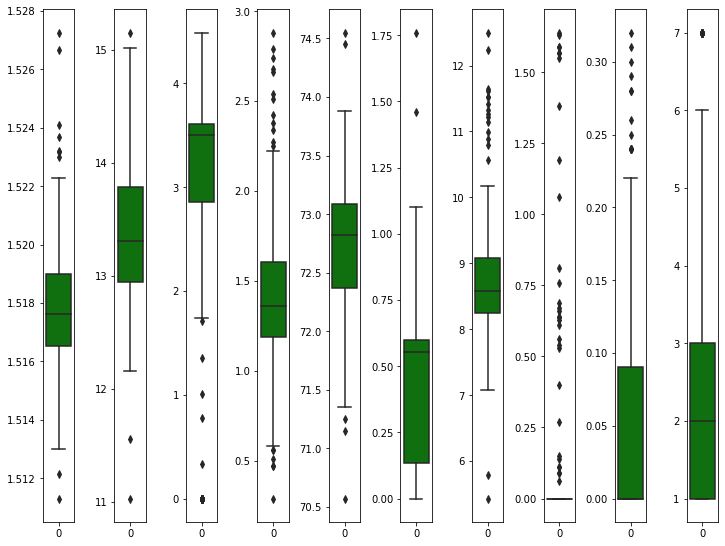

In [32]:
collist = data_new.columns.values
ncol= 35
nrows = 14
plt.figure(figsize = (ncol, 3*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(data = data_new[collist[i]], color = 'green', orient = 'v')
    plt.tight_layout()

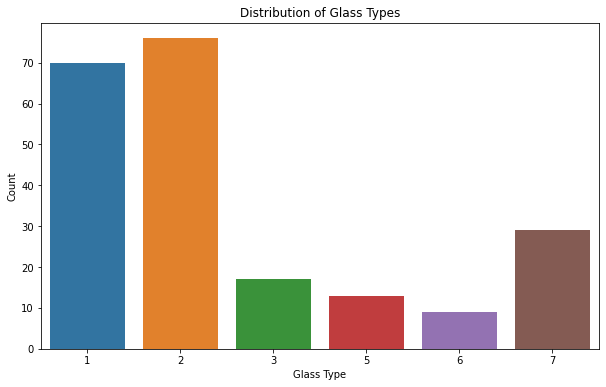

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Type", data=data)
plt.title("Distribution of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel("Count")
plt.show()

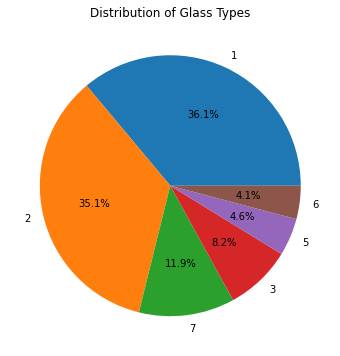

In [33]:
# Count the occurrences of each glass type
type_counts = data_new['Type'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Glass Types")

# Display the plot
plt.show()


In [35]:
# Binarisation of quality into 1 for type less or equal to 4 and 0 for type 5 to 7
data_new['Type'] = [0 if x >= 5 else 1 for x in data_new['Type']]

C:\Users\ANSH\AppData\Local\Temp\ipykernel_13908\2039373696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Type'] = [0 if x >= 5 else 1 for x in data_new['Type']]


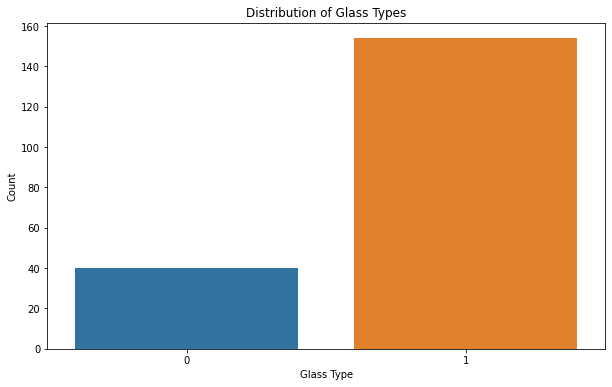

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Type", data=data_new)
plt.title("Distribution of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel("Count")
plt.show()

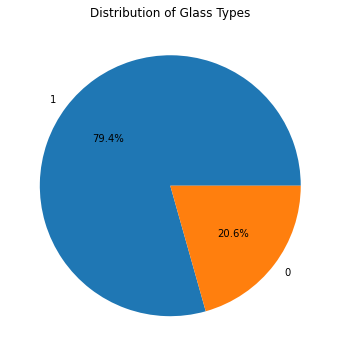

In [38]:
# Count the occurrences of each glass type
type_counts = data_new['Type'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Glass Types")

# Display the plot
plt.show()


In [ ]:
#As we can see after binarising our target variable the data seems to be imbalance .... We have to balacne the data


In [40]:
# separating the features and target variable

x = data_new.drop(columns = ['Type'])
y = data_new['Type']

In [41]:
# Now balance our dataset 
from imblearn.over_sampling import SMOTE

In [43]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [44]:
y.value_counts()

1    154
0    154
Name: Type, dtype: int64

# MODEL TRAINING

In [50]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [51]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression()


In [52]:
# instanciate for each model

models = {"Decision Tree": decision_tree,
          "Random Forest": random_forest,
          "SVM": svm,
          "K-Nearest Neighbors": knn,
          "Logistic Regression": logistic_regression}

In [53]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n")


--- Decision Tree ---
Accuracy: 0.9481
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        37
           1       0.93      0.97      0.95        40

    accuracy                           0.95        77
   macro avg       0.95      0.95      0.95        77
weighted avg       0.95      0.95      0.95        77


--- Random Forest ---
Accuracy: 0.9351
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        37
           1       0.91      0.97      0.94        40

    accuracy                           0.94        77
   macro avg       0.94      0.93      0.93        77
weighted avg       0.94      0.94      0.93        77


--- SVM ---
Accuracy: 0.4805
Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        37
           1       0.00      0.00      0.00        40

    

C:\Users\ANSH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANSH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANSH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--- K-Nearest Neighbors ---
Accuracy: 0.9481
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        37
           1       0.93      0.97      0.95        40

    accuracy                           0.95        77
   macro avg       0.95      0.95      0.95        77
weighted avg       0.95      0.95      0.95        77


--- Logistic Regression ---
Accuracy: 0.8831
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        37
           1       0.82      1.00      0.90        40

    accuracy                           0.88        77
   macro avg       0.91      0.88      0.88        77
weighted avg       0.90      0.88      0.88        77




# HYPERPARAMETER TUNING

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
grid_param = {
    'criterion':['gini', 'entropy'],
    'max_depth': range(5, 20),
    'min_samples_leaf':range(2, 6),
    'min_samples_split':range(2, 6),
    'max_leaf_nodes': range(2, 6)
}

In [56]:
grid_search = GridSearchCV(decision_tree, grid_param, cv=5)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20),
                         'max_leaf_nodes': range(2, 6),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(2, 6)})

In [57]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [58]:

clf = DecisionTreeClassifier(criterion= 'entropy', max_depth = 5, min_samples_split = 2, min_samples_leaf = 2, max_leaf_nodes = 3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=3,
                       min_samples_leaf=2)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [59]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.948051948051948

In [62]:
conf_mat = confusion_matrix(y_test, y_pred)

print('\n confusion matrix = ', '\n', conf_mat)

print('\n Accuracy Report', '\n', accuracy_score(y_test, y_pred)*100)


 confusion matrix =  
 [[34  3]
 [ 1 39]]

 Accuracy Report 
 94.8051948051948


# ROC-AUC CURVE

fpr, tpr, thresolds = roc_curve(y_test, y_pred)

In [64]:
print('False positive rate is :- ', fpr)
print('True positive rate is :- ', tpr)
print('Thresolds', thresolds)

False positive rate is :-  [0.         0.08108108 1.        ]
True positive rate is :-  [0.    0.975 1.   ]
Thresolds [2 1 0]


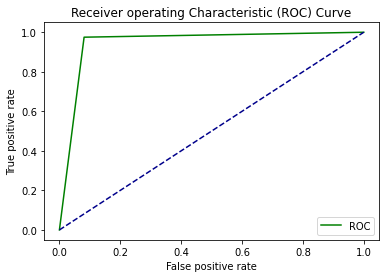

In [65]:
plt.plot(fpr, tpr, color = 'green', label = 'ROC')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# SAVING OUR MODEL AND DO PREDICTING

In [66]:
import joblib
joblib.dump(clf, "final_model")


['final_model']

In [68]:
model = joblib.load("final_model")

In [69]:
# Sample input data for prediction
sample_data = [[1.52101, 13.64, 4.49, 1.10, 71.78, 0.06, 8.75, 0.00, 0.00]]

# Make predictions
predictions = model.predict(sample_data)

# Display the predicted glass type
print("Predicted Glass Type:", predictions)


Predicted Glass Type: [1]


C:\Users\ANSH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
